> Car price prediction using Regression

In [43]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv(r'C:\Users\Brado\Desktop\DATA SCIENCE PROJECTS\CAR_PRICE_PREDICTION_USING_REGRESSION_METHODS\quikr_car.csv')

In [3]:
#view the contents of the data
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


> Identifying Null Values

In [4]:
#calulating the count of null values present in the dataset
sumofnull = df.isnull().sum()
sumofnull

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

> Identifying Data Types

In [5]:
# getting to know the datatypes of the dataset
dtypes = df.dtypes
dtypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

> Preprocessing Car Names

In [6]:
# Duplicating the dataset
car = df.copy()

In [7]:
car['name'] = car['name'].str.split(' ').str.slice(0, 3).str.join(' ')

> Filtering and Converting 'Year' to integer

In [8]:
# Filter the rows where 'year' values are numeric
numeric_year_mask = car['year'].str.isnumeric()

# Use boolean indexing to select these rows
car = car[numeric_year_mask]

# Convert the filtered 'year' column to integers using astype()
car['year'] = car['year'].astype(int)


> Cleaning 'Price' Column

In [9]:
# Filter the 'car' DataFrame, excluding rows where the 'Price' column contains the value 'Ask For Price'
car = car[car['Price'] != 'Ask For Price']

# Make a copy of the filtered DataFrame and assign it back to the variable 'car'
car = car.copy()

# Apply the 'str.replace(',', '')' method to remove commas
car['Price'] = car['Price'].str.replace(',', '')

# Convert the 'Price' column values to integers using astype(int)
car['Price'] = car['Price'].astype(int)

> Cleaning 'Kilometres Driven Column'

In [10]:
# Create a copy of the DataFrame 'car'
car = car.copy()

# Modify the 'kms_driven' column to extract the numerical part and remove commas
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0)
car['kms_driven'] = car['kms_driven'].str.replace(',', '')

# Filter 'car_copy' to retain rows where 'kms_driven' contains only numeric values
car = car[car['kms_driven'].str.isnumeric()]

# Convert the 'kms_driven' column to integers using 'astype(int)'
car['kms_driven'] = car['kms_driven'].astype(int)


> Filtering Rows with Non-Null 'Fuel Type'

In [11]:
# Filter the 'car' DataFrame to exclude rows where the 'fuel_type' column contains NaN values
car = car[car['fuel_type'].notna()]


> Visualizing Price Distribution

In [12]:
price_col = car['Price']

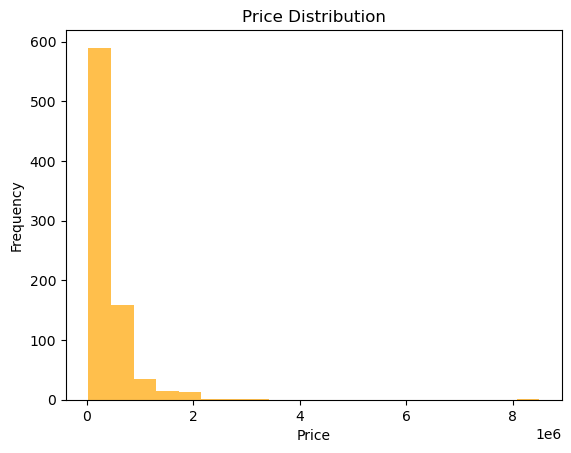

In [13]:
#plotting a histogram
plt.hist(price_col, bins= 20, color= 'orange', alpha= 0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

> Visualizing Kilometres Driven Distribution

In [14]:
kms_driven_col = car['kms_driven']

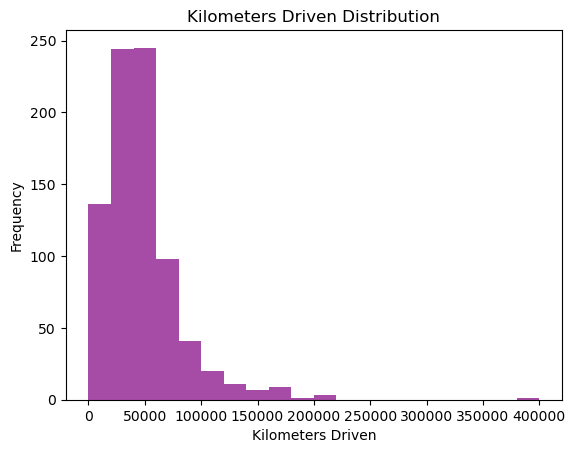

In [15]:
# plot a histogram
plt.hist(kms_driven_col, bins=20, color='purple', alpha=0.7)
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.title('Kilometers Driven Distribution')
plt.show()


> Visualizing Fuel Type Distribution

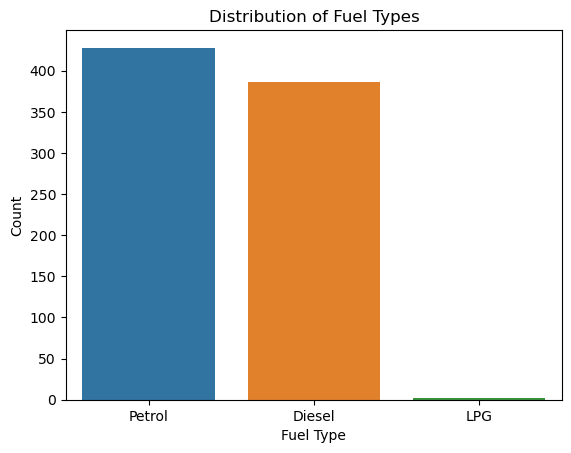

In [16]:
sns.countplot(x = car["fuel_type"])
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

> Visualizing Car Companies Distribution

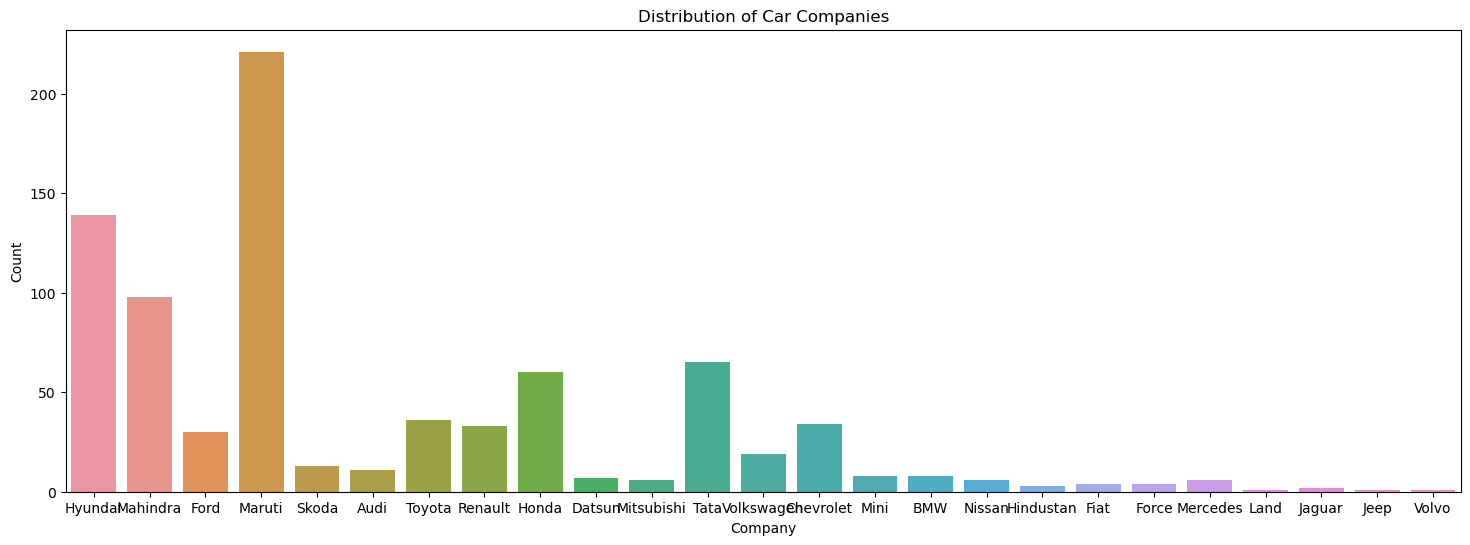

In [17]:
plt.figure(figsize=(18,6))
comp_ax = sns.countplot(x=car["company"])
plt.title('Distribution of Car Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

> Exploring Price Variation Based on  Fuel Type

C:\Users\Brado\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


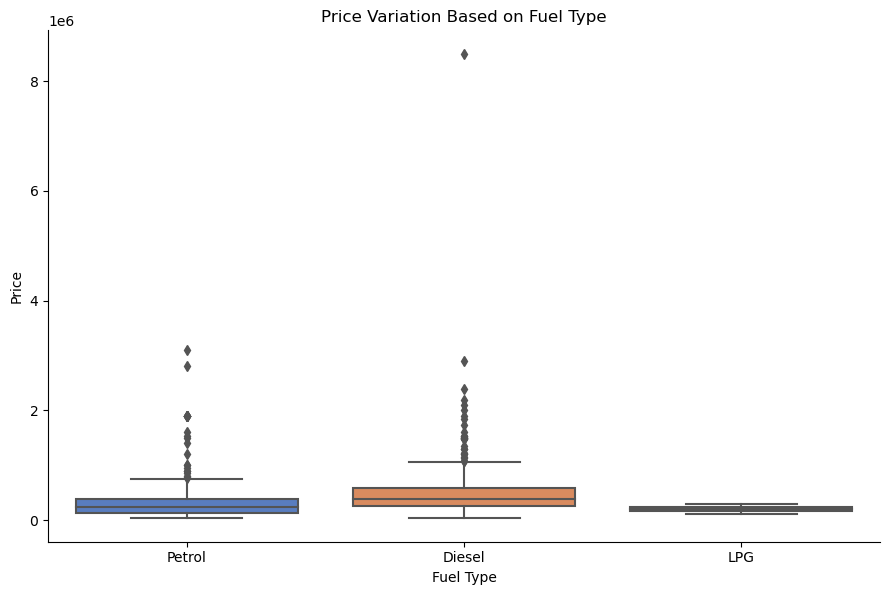

In [18]:
catplot = sns.catplot(x='fuel_type', y='Price', kind='box', data=car, palette='muted', height=6, aspect=1.5)

# Set titles and labels
catplot.set(title='Price Variation Based on Fuel Type', xlabel='Fuel Type', ylabel='Price')

# Show the plot
plt.show()

> Analyzing Car Price Variations Among Companies

C:\Users\Brado\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


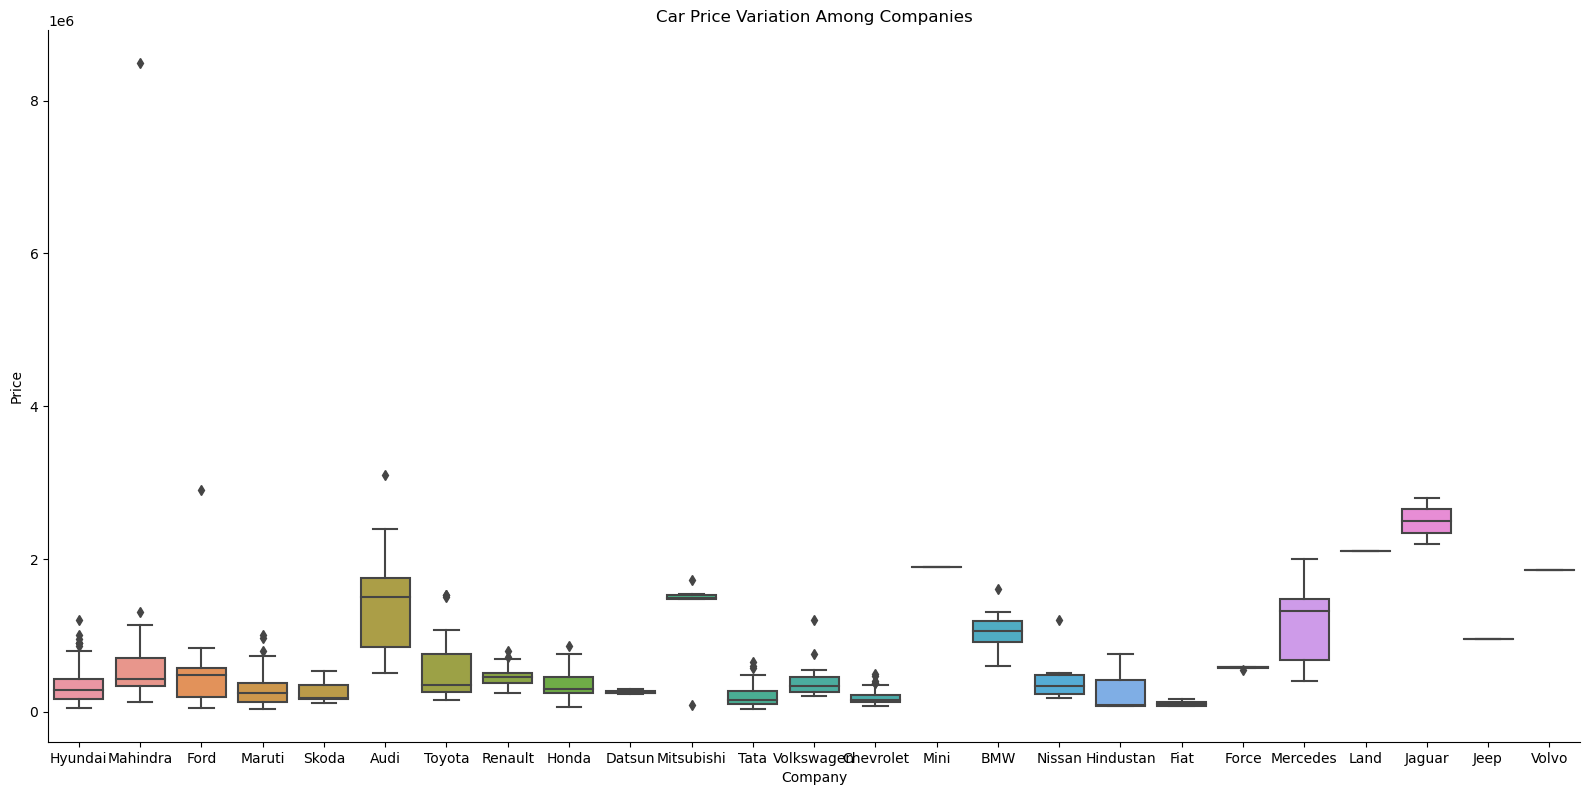

In [19]:
boxplt = sns.catplot(x='company', y='Price', kind='box', data=car, height=8, aspect=2)

# Set titles and labels
boxplt.set(title='Car Price Variation Among Companies', xlabel='Company', ylabel='Price')

# Show the plot
plt.show()

> Analyzing Car Price trends Over Years

C:\Users\Brado\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


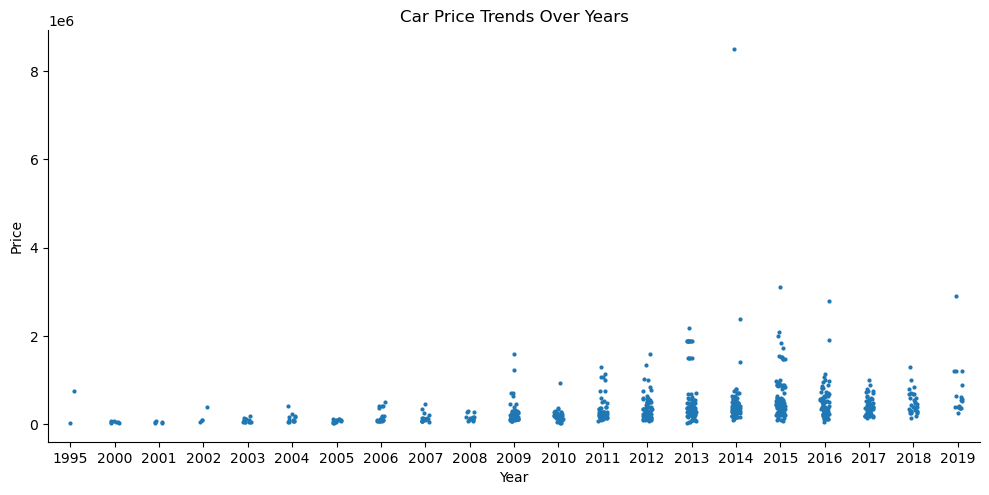

In [20]:
striplt = sns.catplot(
    x="year",  # Set year as the variable on the x-axis
    y="Price",  # Set Price as the variable on the y-axis
    data=car,  # Use the car DataFrame as the data source
    kind="strip",  # Set the plot kind as a strip plot
    height=5,  # Set the plot height to 5
    aspect=2,  # Set the aspect ratio to 2
    marker="o",  # Set marker style to circle ('o')
    size=3  # Set marker size to 3
)
# Set titles and labels
striplt.set(title='Car Price Trends Over Years', xlabel='Year', ylabel='Price')

# Show the plot
plt.show()

> Splitting Data for Regression Modelling

In [21]:
x = car.drop(columns = 'Price', axis = 1)
y = car['Price']

In [26]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [29]:
# Initialize an instance of OneHotEncoder and fit it to the categorical columns
ohe = OneHotEncoder()
ohe.fit(car[['name', 'company', 'fuel_type']])

# Create a column transformer
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)

>  Building and Evaluating Linear Regression Model

In [39]:
#Instantiating the model
lr = LinearRegression()

In [40]:
# creating a pipeline
pipe = make_pipeline(
    column_trans,
    lr
)

pipe.fit(x_train, y_train)

# Generate predictions on the test data
y_pred = pipe.predict(x_test)

# Calculate the R-squared score
lr_score = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", lr_score)

R-squared score: 0.7191683977389449


> Building and Evaluating Lasso Regression Model

In [42]:
# Instantiate a Lasso model
model_lasso = Lasso(alpha=1, max_iter=10000, tol=0.001)

# Create a pipeline
pipe = make_pipeline(column_trans, model_lasso)

# Fit the pipeline on the training data
pipe.fit(x_train, y_train)

# Generate predictions on the test data
y_pred = pipe.predict(x_test)

# Calculate the R-squared score
lasso_score = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score for Lasso Regression:", lasso_score)

R-squared score for Lasso Regression: 0.7797022926388398


C:\Users\Brado\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832781730130.6172, tolerance: 164756881044.2045
  model = cd_fast.sparse_enet_coordinate_descent(


> Building and Evaluating RandomForest Regression Model

In [44]:
# Instantiate a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=10)

# Create a pipeline
pipe = make_pipeline(column_trans, rf)

# Fit the pipeline on the training data
pipe.fit(x_train, y_train)

# Generate predictions on the test data
y_pred = pipe.predict(x_test)

# Calculate the R-squared score
rf_score = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score for RandomForest Regression:", rf_score)

R-squared score for RandomForest Regression: 0.8730351207441608


> Final Prediction

In [50]:
# Compare R-squared scores
scores = {'Linear Regression': lr_score, 'Lasso Regression': lasso_score, 'RandomForest Regression': rf_score}
best_model = max(scores, key=scores.get)
print("Best Model:", best_model)

# Use the best model to make predictions
if best_model == 'Linear Regression':
    prediction = pipe.predict(x_test)  # Assuming 'sample_data' is the data for prediction
elif best_model == 'Lasso Regression':
    prediction = pipe.predict(x_test)
elif best_model == 'RandomForest Regression':
    prediction = pipe.predict(x_test)


Best Model: RandomForest Regression
